# Machine Learning Operations (MLOps)

MLOps is a practice for collaboration and communication between data scientists and operations professionals to help manage production ML (Machine Learning) lifecycles. This includes managing the ML lifecycle from the initial experimentation phase to deployment, monitoring, and management.

## Import Libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import pickle

## Load Data

In [5]:
df = pd.read_csv('data/hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


## EDA - Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   experience                  6 non-null      object 
 1   test_score(out of 10)       7 non-null      float64
 2   interview_score(out of 10)  8 non-null      int64  
 3   salary($)                   8 non-null      int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 388.0+ bytes


In [7]:
df.describe()

,test_score(out of 10),interview_score(out of 10),salary($)
count,7.000000,8.000000,8.00000
mean,7.857143,7.875000,63000.00000
std,1.345185,1.642081,11501.55269
min,6.000000,6.000000,45000.00000
25%,7.000000,6.750000,57500.00000
50%,8.000000,7.500000,63500.00000
75%,8.500000,9.250000,70500.00000
max,10.000000,10.000000,80000.00000


In [8]:
df.isnull().sum()

experience                    2
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

## Data Visualization

<Axes: xlabel='experience', ylabel='count'>

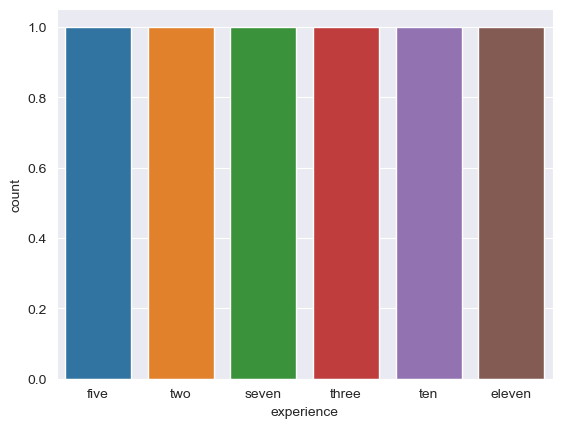

In [9]:
sns.countplot(x=df['experience'])

In [10]:
d = {'one':1, 'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'seven':7, 'eight':8, 'nine':9, 'ten':10, 'eleven':11, 'twelve':12, 'zero':0, 0:0}
df['experience'] = df['experience'].map(d)


<Axes: xlabel='experience', ylabel='count'>

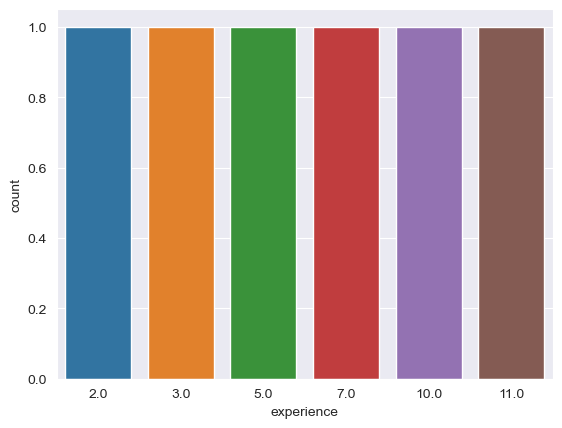

In [11]:
sns.countplot(x=df['experience'])

In [12]:
df['experience'] = df['experience'].fillna(0)

In [13]:
df.isnull().sum()

experience                    0
test_score(out of 10)         1
interview_score(out of 10)    0
salary($)                     0
dtype: int64

In [15]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(df['test_score(out of 10)'].mean())

## Modeling

In [16]:
X = df.drop('salary($)', axis=1)
y = df['salary($)']

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [19]:
model = lr.fit(X, y)
pickle.dump(model, open('salary-calculater.pkl', 'wb'))

## Load Model from Pickle File

In [20]:
new_model = pickle.load(open('salary-calculater.pkl', 'rb'))

In [21]:
new_model.predict([[2, 9, 6]])

array([53290.89255945])

In [22]:
new_model.predict([[12, 10, 10]])

array([92268.07227784])

In [23]:
new_model.predict([[0, 0, 0]])

array([17237.33031373])